1 概要

什么递归
  直接或间接调用自身
什么时候用递归
  原问题可以分解成子问题（必要条件）
  分解后的原问题和子问题相似（递归方程）
  分解次数有限（子问题有穷）
  最终问题可直接解决（递归边界）
递归的套路
  确定原问题能否分解成子问题
  搞清楚“递归方程”和“递归边界”
  示例：见“2 递归的套路”
递归实战
  斐波那切数列
  汉诺塔问题
  快速排序
  二叉树遍历

2 递归的套路

In [2]:
#影分身
#递归框架
def ying_fen_shen(cha_ke_la):#递归的输入 查克拉
    if cha_ke_la == 0:#边界条件 查克拉为空时停止
        return 0
    #to-do 可以执行一些操作
    cha_ke_la -= 10#每次耗用10份查克拉
    luo_xuan_wan = ying_fen_shen(cha_ke_la)#造一个影分身出螺旋丸
    xian_ren_mo_shi = ying_fen_shen(cha_ke_la)#造一个影分身出仙人模式
    return luo_xuan_wan + xian_ren_mo_shi#返回螺旋丸和仙人模式

3 递归实战-斐波那切数列
  递归方程：f(n) = f(n-1) + f(n-2)
  递归边界：f(1) = 1 , f(0) = 1

In [14]:
arr = []
def fibonacci(n):
    if n == 1 or n == 0:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)
fibonacci(10)
#算法分析：采用递归数进行分析，如下图，可知算法复杂度为2^n，NP问题，肯定是要优化的，空间复杂度为O（1）

89

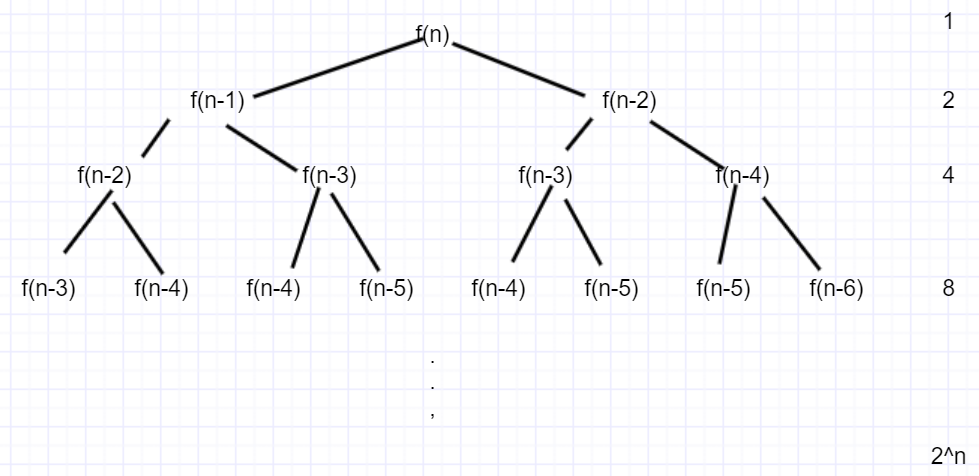

In [23]:
#优化一 去除重复 利用字典
#时间复杂度为O（n），空间复杂度为O（n）
dic = dict()
def fibonacci(n):
    if n == 0 or n == 1:
        return 1
    if n in dic:
        return dic[n]
    else:
        res = fibonacci(n-1) + fibonacci(n-2)
        dic[n] = res
        return res
    
fibonacci(10)
dic

{2: 2, 3: 3, 4: 5, 5: 8, 6: 13, 7: 21, 8: 34, 9: 55, 10: 89}

In [1]:
#优化二 空降复杂度优化 递推
#时间复杂度：O（n），空间复杂度：O（1）
def fibonacci(n):
    if n == 1:
        return 1
    pre = 2
    pre_pre = 1
    index = 3
    res = 0
    while index <= n:
        res = pre + pre_pre
        pre_pre = pre
        pre = res
        index += 1
    return res
    
fibonacci(2)

0

优化三 公式优化 空降复杂度优化 递推
f(0) = 1
f(1) = 1
f(2) = f(1) + f(0)
f(3) = f(2) + f(1)
f(4) = f(3) + f(2) = 2*f(2) + f(1)
f(5) = f(4) + f(3) = 2*f(2) + f(1) + f(2) + f(1) = 3*f(2) + 2f(1)
f(6) = f(5) + f(4) = 3*f(2) + 2f(1) + 2*f(2) + f(1) = 5*f(2) + 3f(1)
f(7) = f(6) + f(5) = 5*f(2) + 3f(1) + 3*f(2) + 2f(1) = 8*f(2) + 5f(1)

3 递归实战-汉诺塔
描述：有三根柱子A,B,C。在A上，按照从小到大摞着N片圆盘。现要把圆盘按原顺序重新摆放在C上，并且规定，任何时刻，在小圆盘上不能放大圆盘，一次只能从一柱子最顶部移一个圆盘到另一柱子顶部
目的：求最短移动次数，以及移动方案
分析：
最后一个状态是N个盘子都在C上
倒数第二个状态，是N-1个盘子都在B上，1个盘子在A上
若要N-1个盘子都在B上，则前一状态是N-2个盘子再C上，1个盘子在A上
若要N-2个盘子都在C上，则前一状态是N-3个盘子再B上，1个盘子在A上
递归方程：f(n,A,B,C) = f(n-1,A,C,B) + 1 + f(n-1,B,A,C)
递归边界：n == 1

In [47]:
a = []
a.append('a'+'b')

In [54]:
path = []
def hanoi(n,A,B,C):
    if n == 1:
        path.append(A + '->' + C)
    else:
        hanoi(n-1,A,C,B)
        path.append(A + '->' + C)
        hanoi(n-1,B,A,C)
        
hanoi(3,'A','B','C')
print('min frq : ' , len(path))
for i in path:
    print(i)

min frq :  7
A->C
A->B
C->B
A->C
B->A
B->C
A->C


3 递归实战-快速排序
算法思想：分治法
算法步骤：
1 找到数组arr中，任意一基准点a
2 遍历arr，使得arr[a]左边的值 均 小于 arr[a]右边的值
3 arr[a]左边的数组，重复步骤1，2；arr[a]右边的数组，重复步骤1，2

In [124]:
#数组中，任意选取一个基准点，将原数组劈成两个数组，左边的小于基准点的值，右边的大于基准点的值
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    left = []
    right = []
    base = arr.pop()
    for i in arr:
        if i < base:
            left.append(i)
        else:
            right.append(i)
    return quick_sort(left) + [base] + quick_sort(right)

arr = [3,2,7,7,5,1,1,6,4]
quick_sort(arr)
print(arr)
#算法复杂度分析
#时间复杂度：内部的for 有n个，即O（n）；return 后的递归，画出递归树后，假设每次的Privot是arr/2，则复杂度为logn，总时间复杂度nlogn
#空间复杂度：递归深度* 每次递归所需的空间 = logn * n = nlogn
#所以此种方法不够优秀 但是好理解

[1, 1, 2, 3, 4, 5, 6, 7, 7]

In [154]:
def quick_sort(arr,left,right):
    if left < right:
        start = left
        end = right
        privot = arr[start]
        #劈开arr，是的左边的比privot小，右边的比privot大
        while left < right:
            while right > left and arr[right] >= privot:
                right -= 1
            arr[left] = arr[right]
            while left < right and arr[left] <= privot:
                left += 1
            arr[right] = arr[left]
        arr[left] = privot
        #此时left=right
        #来，左边画一条龙
        quick_sort(arr,start,left)
        #右边划一条彩虹
        quick_sort(arr,right+1,end)

arr = [3,1,2,7,6,7,5,1,1,6,4]
quick_sort(arr,0,len(arr)-1)
print(arr)      

[1, 1, 1, 2, 3, 4, 5, 6, 6, 7, 7]


3 递归实战-二叉树遍历
见“算法学习笔记-树和堆-二叉树遍历”